# HQ-SAM dev
source code location
```
stomatapy
├── models
    ├── sam_hq.py
```

### List all datasets

In [1]:
%cd ..

c:\Users\zhongyua\OneDrive\Academics\2023 ETH\Projects\PhD thesis\StomataPy


In [4]:
import os
from tqdm import tqdm
from stomatapy.core.core import get_paths, imread_rgb
from stomatapy.core.isat import Anything2ISAT
from stomatapy.models.sam_hq import SAMHQ

samhq_configs = {'points_per_side': (24,), 'min_mask_ratio': 0.0001, 'max_mask_ratio': 0.4}  # SAM-HQ auto label configuration

sample_image_dir = 'test'

def get_annotations(sample_image_dir: str, samhq_configs:dict, catergory: str = 'stomatal complex', visualize: bool = False, random_color: bool = True) -> None:
    """
    Generate ISAT annotations JSON files for images in a specified directory using SAM-HQ configurations
    
    Args:
    - sample_image_dir (str): a directory containing sample images
    - samhq_configs (dict): the configuration for SAM-HQ including points_per_side, min_mask_ratio, and max_mask_ratio (ratio means size percentage to the entire image)
    - category (str): the category label for the annotations, defaults to 'pavement cell'
    - visualize (bool): if True, visualize the masks on images
    - random_color (bool): if True and visualizing, use random colors for masks

    Returns:
    - None: annotations are generated and potentially visualized
    """
    points_per_side, min_mask_ratio, max_mask_ratio = samhq_configs['points_per_side'], samhq_configs['min_mask_ratio'], samhq_configs['max_mask_ratio']  # get SAN-HQ auto mask configs
    image_paths = get_paths(sample_image_dir, '.tif') + get_paths(sample_image_dir, '.jpg')  # get the image paths under the species folder
    for image_path in tqdm(image_paths, total=len(image_paths)):
        image, masks = imread_rgb(image_path), []  # load the image in RGB scale
        try:
            auto_masks = SAMHQ(image_path=image_path, points_per_side=points_per_side, min_mask_ratio=min_mask_ratio, max_mask_ratio=max_mask_ratio).auto_label(ellipse_threshold=0, statistics_filter=False)  # get the auto labelled masks
            # masks = SAMHQ.isolate_masks(auto_masks)  # filter redundant masks
            masks = auto_masks
            if visualize:
                visual_masks = [mask['segmentation'] for mask in masks]  # get only bool masks
                SAMHQ.show_masks(image, visual_masks, random_color=random_color)  # visualize bool masks
            if len(masks) > 0:
                Anything2ISAT.from_samhq(masks, image, image_path, catergory=catergory, if_remove_overlapping_masks=False)  # export the ISAT json file
        except ValueError:
            pass
    return None

  0%|          | 0/1 [00:00<?, ?it/s]

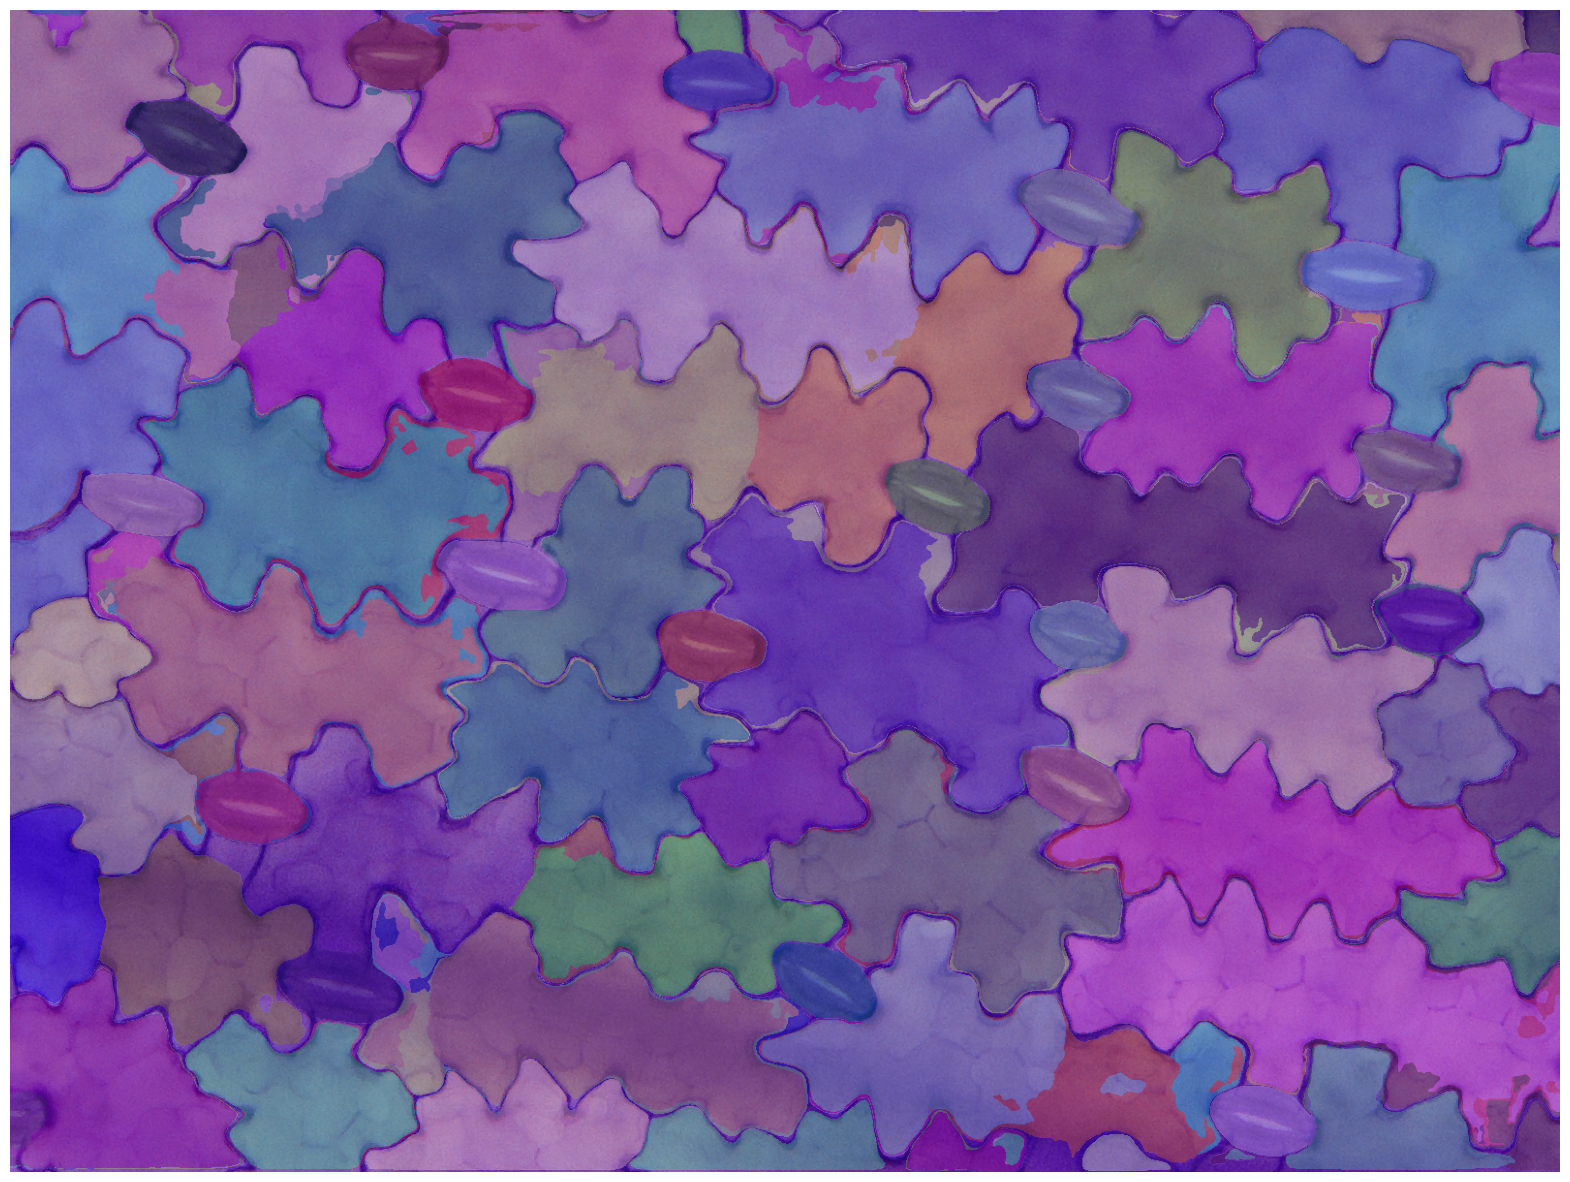

100%|██████████| 1/1 [04:52<00:00, 292.38s/it]


In [5]:
get_annotations(sample_image_dir, samhq_configs, visualize=True)